In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


titanic = pd.read_csv('/content/titanic.csv')
print(titanic.head(7))



   PassengerId                                               Name  Pclass  \
0            1                            Braund, Mr. Owen Harris       3   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       1   
2            3                             Heikkinen, Miss. Laina       3   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)       1   
4            5                           Allen, Mr. William Henry       3   
5            6                                   Moran, Mr. James       3   
6            7                            McCarthy, Mr. Timothy J       1   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    mal

In [132]:
titanic.insert(loc=5, column='roundedAge', value=titanic['Age'].round())

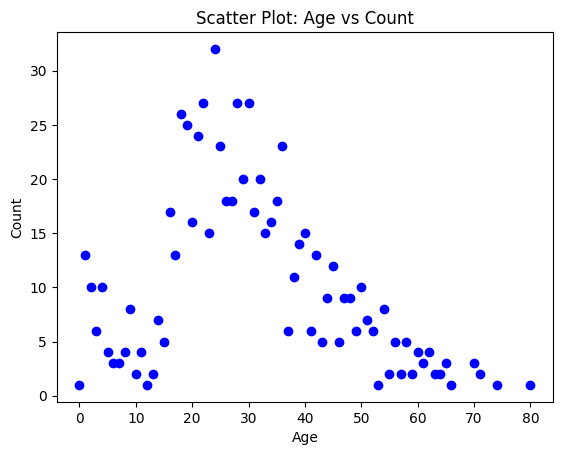

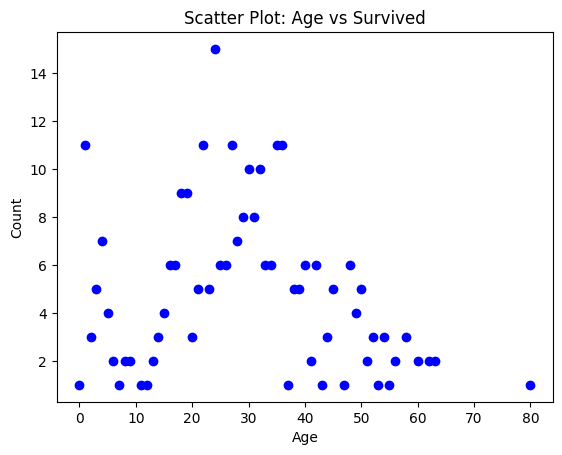

In [148]:
ageGroupCount = titanic.groupby('roundedAge').size()

x=ageGroupCount.index.values
y=ageGroupCount.values

plt.scatter(x, y, color='blue')
plt.title("Scatter Plot: Age vs Count")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

filtered_df = titanic[titanic['Survived'] == 1]
ageGroupCount = filtered_df.groupby('roundedAge').size()

x=ageGroupCount.index.values
y=ageGroupCount.values

plt.scatter(x, y, color='blue')
plt.title("Scatter Plot: Age vs Survived")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [88]:
titanic = titanic.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
print(titanic.head(7))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0
5       3    male   NaN      0      0   8.4583        Q         0
6       1    male  54.0      0      0  51.8625        S         0


In [89]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)
print(titanic.head(7))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0
5       3    male  28.0      0      0   8.4583        Q         0
6       1    male  54.0      0      0  51.8625        S         0


/tmp/ipython-input-89-2027916434.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [90]:
# Fill missing 'Embarked' with the most frequent value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

titanic = titanic.dropna(subset=['Fare'])

print(titanic.head(7))

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Survived
0       3    male  22.0      1      0   7.2500        S         0
1       1  female  38.0      1      0  71.2833        C         1
2       3  female  26.0      0      0   7.9250        S         1
3       1  female  35.0      1      0  53.1000        S         1
4       3    male  35.0      0      0   8.0500        S         0
5       3    male  28.0      0      0   8.4583        Q         0
6       1    male  54.0      0      0  51.8625        S         0


/tmp/ipython-input-90-3908325868.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [91]:
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
print(titanic.head(7))

   Pclass   Age  SibSp  Parch     Fare  Survived  Sex_male  Embarked_Q  \
0       3  22.0      1      0   7.2500         0      True       False   
1       1  38.0      1      0  71.2833         1     False       False   
2       3  26.0      0      0   7.9250         1     False       False   
3       1  35.0      1      0  53.1000         1     False       False   
4       3  35.0      0      0   8.0500         0      True       False   
5       3  28.0      0      0   8.4583         0      True        True   
6       1  54.0      0      0  51.8625         0      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
5       False  
6        True  


In [92]:
X = titanic.drop(columns=['Survived'])  # Features
y = titanic['Survived']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Now the data is ready for modeling

In [93]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [94]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [102]:
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
print(dt_predictions)
print(svm_predictions)

[0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]


In [113]:
dt_accuracy = accuracy_score(y_test, dt_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")


Decision Tree Accuracy: 78.21%
SVM Accuracy: 82.12%


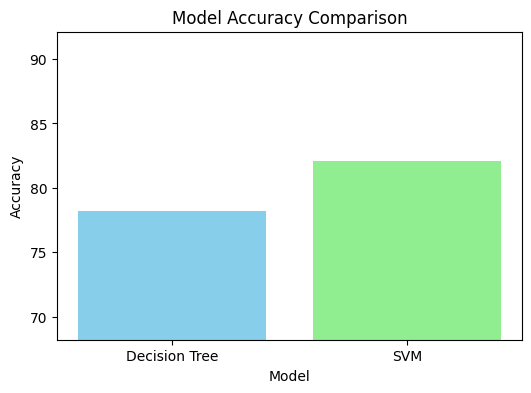

In [114]:
data_points = [dt_accuracy * 100, svm_accuracy * 100]
labels = ['Decision Tree', 'SVM']

plt.figure(figsize=(6, 4))
plt.bar(labels, data_points, color=['skyblue', 'lightgreen'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(min(data_points) - 10, max(data_points) + 10)
plt.show()


# TASK#**2**

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()

print(iris)

# X = iris.data  # Features
# y = iris.target  # Target

# # Split the data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize Random Forest Classifier with default n_estimators=10
# rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# # Train the model
# rf_model.fit(X_train, y_train)

# # Make predictions
# y_pred = rf_model.predict(X_test)

# # Evaluate the model accuracy
# default_accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy with default n_estimators=10: {default_accuracy * 100:.2f}%")


{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
X = iris.data  # Features
y = iris.target  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier with default n_estimators=10
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model accuracy
default_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with default n_estimators=10: {default_accuracy * 100:.2f}%")

Accuracy with default n_estimators=10: 100.00%


In [ ]:
# Fine-tune the model by changing the number of trees (n_estimators)
best_accuracy = 0
best_n_estimators = 0

# Test different values for n_estimators
for n in range(10, 201, 10):  # Test values from 10 to 200, incremented by 10
    rf_model = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n

print(f"Best Accuracy: {best_accuracy * 100:.2f}% with n_estimators = {best_n_estimators}")


Best Accuracy: 100.00% with n_estimators = 10
